In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import scienceplots
%matplotlib inline
from seaborn import scatterplot, relplot
plt.style.use(['seaborn-v0_8-paper'])

with open('./lyft_avhv_conflict.pkl', 'rb') as file:
    lyft_avhv_conflict_list = pickle.load(file)

with open('./lyft_hvhv_conflict.pkl', 'rb') as file:
    lyft_hvhv_conflict_list = pickle.load(file)

In [2]:
"""
Construct a dataframe including all the conflicts' information

Conflict type:
PET:
leader_type:
follower_type:
leader_average_speed
follower_average_speed
"""
conflict_cols_in_df = [
    "conflict_type",
    "Vehicle order",
    "leader_type",
    "follower_type",
    "PET",
    "leader_average_speed",
    "follower_average_speed"
]

conflict_rows_in_df = list()

lyft_conflict_list = lyft_avhv_conflict_list + lyft_hvhv_conflict_list

for conflict in lyft_conflict_list:
    leader_type = "AV" if conflict.is_first_AV else "HV"
    follower_type = "AV" if conflict.is_second_AV else "HV" 
    # tfrecord_index = conflict.tfrecord_index
    # scenario_index = conflict.scenario_index
    conflict_type = "Cross" if conflict.category == "cross" else "Merge"
    conflict_rows_in_df.append([
        conflict_type,
        leader_type+"-"+follower_type,
        leader_type,
        follower_type,
        conflict.PET,
        conflict.first_veh_average_speed,
        conflict.second_veh_average_speed,
    ])

conflict_df = pd.DataFrame(conflict_rows_in_df, columns=conflict_cols_in_df)

"""
Post-process
- Only consider PET <= 10s
"""
PET_THRESHOLD = 10
conflict_df = conflict_df[conflict_df["PET"] <= PET_THRESHOLD]

conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 858
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   conflict_type           859 non-null    object 
 1   Vehicle order           859 non-null    object 
 2   leader_type             859 non-null    object 
 3   follower_type           859 non-null    object 
 4   PET                     859 non-null    float64
 5   leader_average_speed    859 non-null    float64
 6   follower_average_speed  859 non-null    float64
dtypes: float64(3), object(4)
memory usage: 53.7+ KB


In [3]:
conflict_df.conflict_type.value_counts()

Merge    626
Cross    233
Name: conflict_type, dtype: int64

In [4]:
merge_df = conflict_df[conflict_df["conflict_type"] == "Merge"]
cross_df = conflict_df[conflict_df["conflict_type"] == "Cross"]

<Figure size 900x300 with 0 Axes>

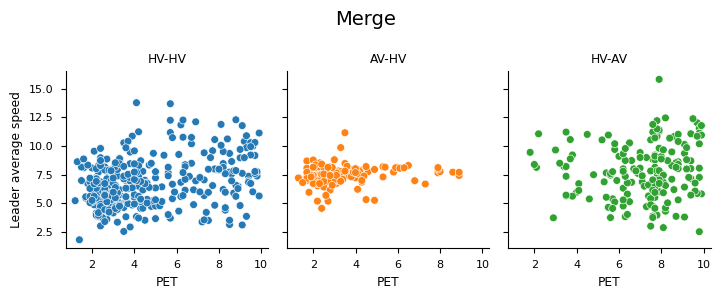

<Figure size 900x300 with 0 Axes>

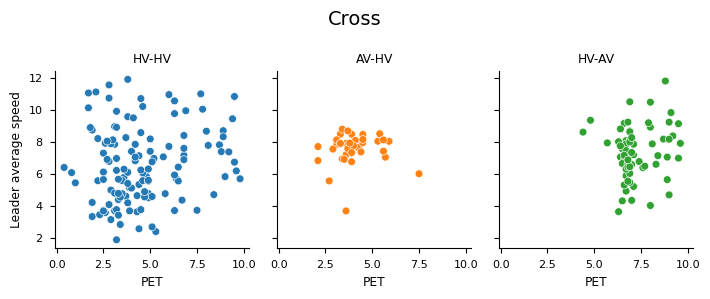

In [5]:
FIGURE_WIDTH, FIGURE_HEIGHT = 3, 3
HVHV_COLOR = '#257ab6'
HVAV_COLOR = '#31a231'
AVHV_COLOR = '#ff8214'
palette = {
    "HV-HV": HVHV_COLOR,
    "HV-AV": HVAV_COLOR,
    "AV-HV": AVHV_COLOR,
}

plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=merge_df, 
    x="PET",
    y="leader_average_speed",
    hue="Vehicle order",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette=palette,
    hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
g.fig.suptitle("Merge", size=14)
g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_ylabel("Leader average speed")
plt.savefig("./outputs/plots/merge_leader_avespeed_PET.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=cross_df, 
    x="PET",
    y="leader_average_speed",
    hue="Vehicle order",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette=palette,
    hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
g.fig.suptitle("Cross", size=14)
g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_ylabel("Leader average speed")
plt.savefig("./outputs/plots/cross_leader_avespeed_PET.png", dpi=300, bbox_inches="tight")

<Figure size 900x300 with 0 Axes>

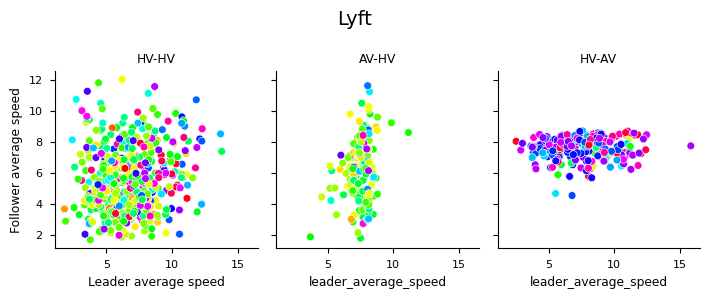

In [17]:
plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=conflict_df, 
    x="leader_average_speed",
    y="follower_average_speed",
    # size=0.1,
    hue="PET",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette="hsv",
    hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
g.fig.suptitle("Lyft", size=14)
# g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_xlabel("Leader average speed")
g.axes[0,0].set_ylabel("Follower average speed")
# g.axes[0,0].set_ylim([0,18])
# g.axes[0,0].set_xlim([0,10])
plt.savefig("./outputs/plots/avespeed_xy_PET_z.png", dpi=300, bbox_inches="tight")

<Figure size 900x300 with 0 Axes>

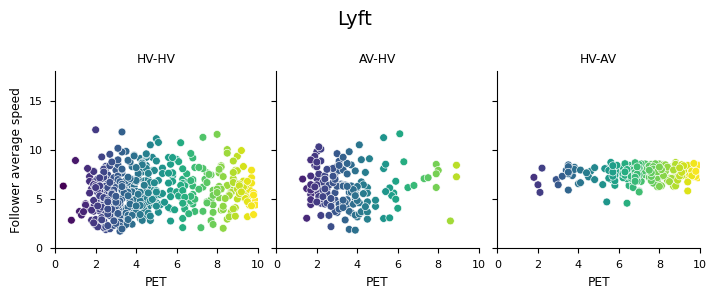

In [11]:
plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=conflict_df, 
    x="PET",
    y="follower_average_speed",
    hue="PET",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette="viridis",
    hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
g.fig.suptitle("Lyft", size=14)
g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_ylabel("Follower average speed")
g.axes[0,0].set_ylim([0,18])
g.axes[0,0].set_xlim([0,10])
plt.savefig("./outputs/plots/avespeed_PET.png", dpi=300, bbox_inches="tight")

<Figure size 900x300 with 0 Axes>

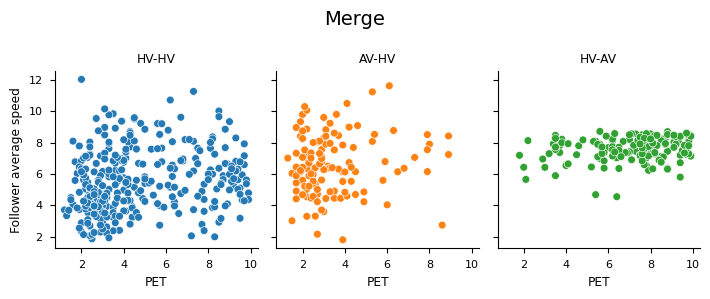

<Figure size 900x300 with 0 Axes>

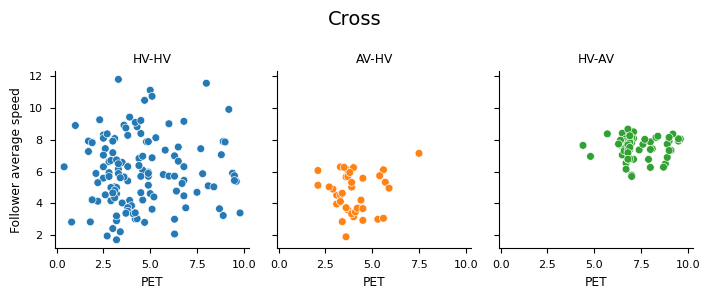

In [66]:
FIGURE_WIDTH, FIGURE_HEIGHT = 3, 3
HVHV_COLOR = '#257ab6'
HVAV_COLOR = '#31a231'
AVHV_COLOR = '#ff8214'
palette = {
    "HV-HV": HVHV_COLOR,
    "HV-AV": HVAV_COLOR,
    "AV-HV": AVHV_COLOR,
}

plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=merge_df, 
    x="PET",
    y="follower_average_speed",
    hue="Vehicle order",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette=palette,
    hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
g.fig.suptitle("Merge", size=14)
g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_ylabel("Follower average speed")
plt.savefig("./outputs/plots/merge_avespeed_PET.png", dpi=300, bbox_inches="tight")

plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=cross_df, 
    x="PET",
    y="follower_average_speed",
    hue="Vehicle order",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette=palette,
    hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
g.fig.suptitle("Cross", size=14)
g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_ylabel("Follower average speed")
plt.savefig("./outputs/plots/cross_avespeed_PET.png", dpi=300, bbox_inches="tight")

Exploration

<Figure size 900x300 with 0 Axes>

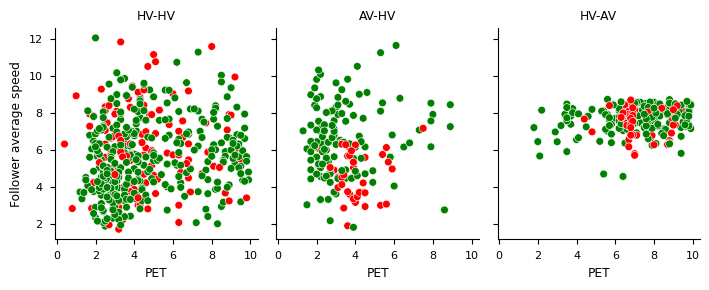

In [80]:
plt.figure(figsize=(FIGURE_WIDTH*3, FIGURE_HEIGHT))

g = relplot(
    data=conflict_df, 
    x="PET",
    y="follower_average_speed",
    hue="conflict_type",
    col="Vehicle order",
    col_order=["HV-HV", "AV-HV", "HV-AV"],
    palette=["r", "g"],
    #hue_order=["HV-HV", "AV-HV", "HV-AV"],
    height=FIGURE_HEIGHT,
    aspect=0.8,
    legend=False,
)
# g.fig.suptitle("Cross", size=14)
# g.fig.subplots_adjust(top=.9)
g.set_titles("{col_name}").tight_layout(w_pad=1)
g.axes[0,0].set_ylabel("Follower average speed")
plt.savefig("./outputs/plots/avespeed_PET_2.png", dpi=300, bbox_inches="tight")

<AxesSubplot: xlabel='PET', ylabel='follower_average_speed'>

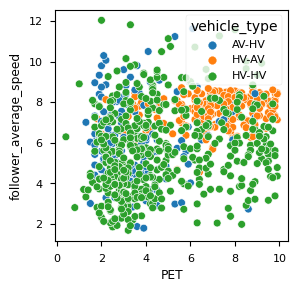

In [24]:
FIGURE_WIDTH, FIGURE_HEIGHT = 3, 3

fig, axs = plt.subplots(1, 1, figsize=(FIGURE_WIDTH, FIGURE_HEIGHT), sharey=True, sharex=True)

scatterplot(
    data=conflict_df, 
    x="PET",
    y="follower_average_speed",
    hue="Vehicle order",
    ax=axs
)

<Figure size 300x300 with 0 Axes>

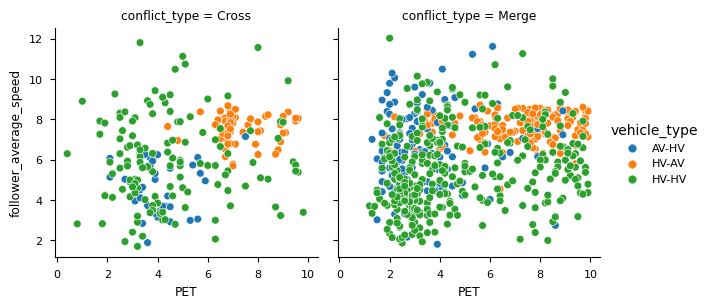

In [15]:
FIGURE_WIDTH, FIGURE_HEIGHT = 3, 3

plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))

relplot(
    data=conflict_df, 
    x="PET",
    y="follower_average_speed",
    hue="Vehicle order",
    col="conflict_type",
    height=FIGURE_HEIGHT,
    aspect=1.0,
)